In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('mall customers.csv')

In [4]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.rename(columns={'Age':'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)': 'score'}, inplace=True)

In [8]:
df.head(10)

,CustomerID,Gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [9]:
df = df.drop('CustomerID', axis=1)

In [10]:
df.head()

,Gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Text(0, 0.5, 'Income')

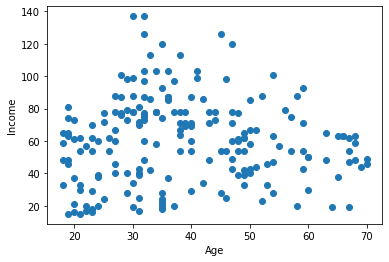

In [12]:
# Plotting age versus income
plt.scatter(df.age, df.income) 

plt.xlabel('Age')
plt.ylabel('Income')

Text(0, 0.5, 'Score')

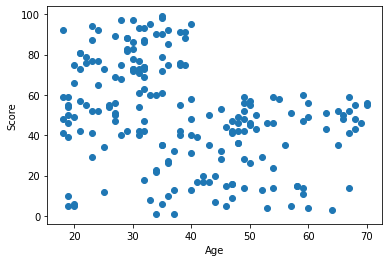

In [13]:
plt.scatter(df.age, df.score)

plt.xlabel('Age')
plt.ylabel('Score')

Text(0, 0.5, 'Income')

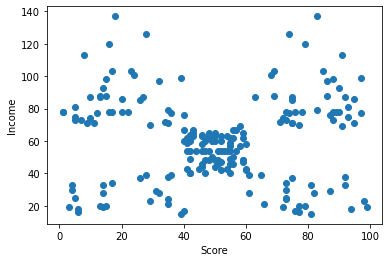

In [15]:
plt.scatter(df.score, df.income)

plt.xlabel('Score')
plt.ylabel('Income')

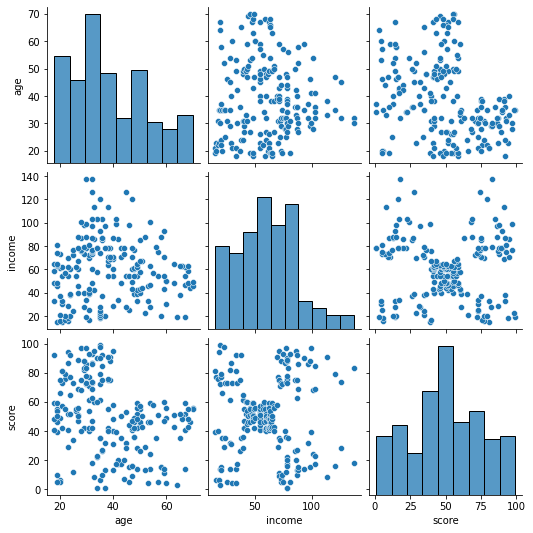

In [16]:
#pairplot
seaborn.pairplot(df[['age', 'income', 'score']])

Text(0, 0.5, 'income')

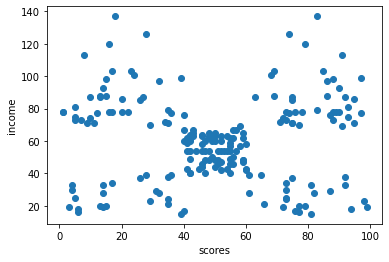

In [17]:
plt.scatter(df.score, df.income)
plt.xlabel('scores')
plt.ylabel('income')

# kmeans

In [18]:
import sklearn.cluster as cluster

In [19]:
kmeans = cluster.KMeans() #n_clusters=8

In [20]:
predicted = kmeans.fit_predict(df[['income','score']])
predicted

array([2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 7, 4, 7, 1, 7, 1, 7,
       4, 7, 1, 7, 1, 7, 1, 7, 1, 7, 4, 7, 1, 7, 4, 7, 1, 7, 1, 7, 1, 7,
       1, 7, 1, 7, 1, 7, 4, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7,
       1, 7, 1, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3,
       6, 3])

In [21]:
df['predicted'] = predicted
df.head()

,Gender,age,income,score,predicted
0,Male,19,15,39,2
1,Male,21,15,81,5
2,Female,20,16,6,2
3,Female,23,16,77,5
4,Female,31,17,40,2


In [22]:
centers = kmeans.cluster_centers_
centers

array([[ 47.65909091,  51.61363636],
       [ 80.18181818,  12.68181818],
       [ 25.72727273,  20.22727273],
       [108.18181818,  82.72727273],
       [ 63.95238095,  46.21428571],
       [ 25.0952381 ,  80.04761905],
       [109.7       ,  22.        ],
       [ 78.03571429,  81.89285714]])

# viz

In [23]:
df0 = df[df.predicted == 0]
df1 = df[df.predicted == 1]
df2 = df[df.predicted == 2]
df3 = df[df.predicted == 3]
df4 = df[df.predicted == 4]
df5 = df[df.predicted == 5]
df6 = df[df.predicted == 6]
df7 = df[df.predicted == 7]

In [24]:
df0.head()

,Gender,age,income,score,predicted
42,Male,48,39,36,0
43,Female,31,39,61,0
45,Female,24,39,65,0
46,Female,50,40,55,0
47,Female,27,40,47,0


In [25]:
df0.shape

(44, 5)

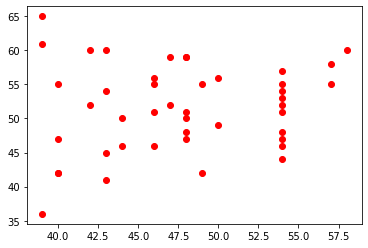

In [26]:
plt.scatter(df0.income , df0.score, color='red', label='cluster_0')

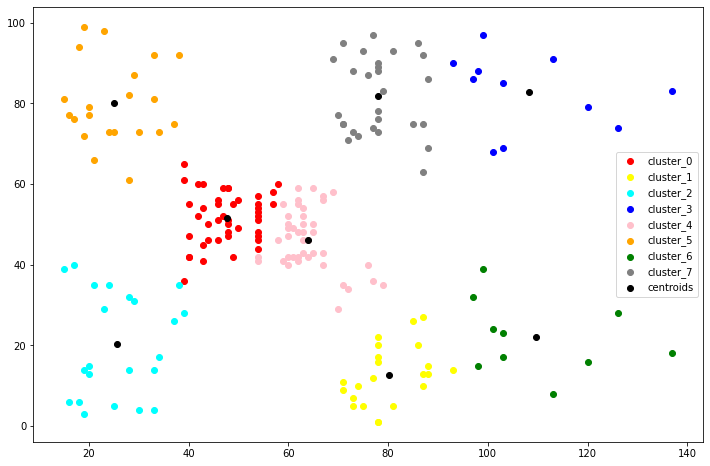

In [27]:
plt.figure(figsize=(12,8))
plt.scatter(df0.income , df0.score, color='red', label='cluster_0')
plt.scatter(df1.income , df1.score, color='yellow', label='cluster_1')
plt.scatter(df2.income , df2.score, color='cyan', label='cluster_2')
plt.scatter(df3.income , df3.score, color='blue', label='cluster_3')
plt.scatter(df4.income , df4.score, color='pink', label='cluster_4')
plt.scatter(df5.income , df5.score, color='orange', label='cluster_5')
plt.scatter(df6.income , df6.score, color='green', label='cluster_6')
plt.scatter(df7.income , df7.score, color='gray', label='cluster_7')

plt.scatter(centers[:,0], centers[:,1], color='black', label='centroids')

plt.legend()

# Elbow Method

In [28]:
wcss = []
clstr = range(1,20)

for k in clstr:
    km = cluster.KMeans(n_clusters=k)
    km.fit(df[['score', 'income']])
    wcss.append(km.inertia_) #sum of squared distance

C:\Users\Tipu Sultan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37239.83554245604,
 30241.343617936593,
 25018.576334776335,
 21850.165282585633,
 20146.012653867874,
 18094.819516005813,
 16161.35300004655,
 14321.881821120058,
 13177.391192382496,
 12087.351587301588,
 11048.383836797877,
 10182.614208255512,
 9885.786408199643,
 8846.361455484695]

Text(0.5, 0, 'Num of Clusters')

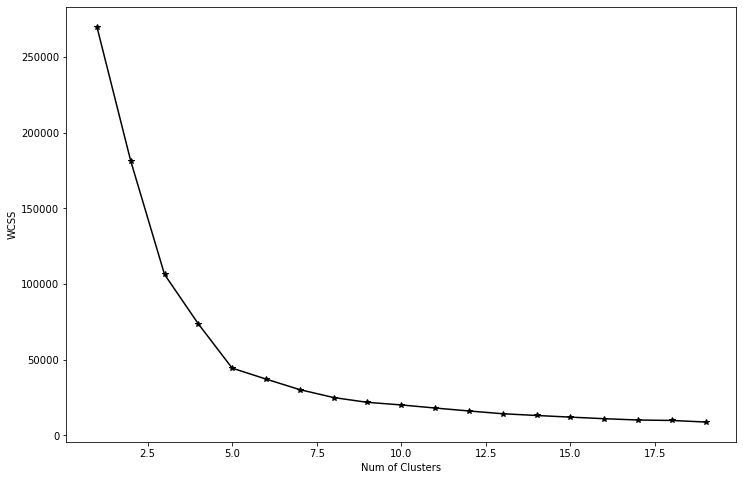

In [30]:
plt.figure(figsize=(12,8))
plt.plot(clstr, wcss, marker='*', color='black')
plt.ylabel('WCSS')
plt.xlabel('Num of Clusters')

In [33]:
!pip install kneed

In [34]:
#plot knee
from kneed import KneeLocator

# Finding the optimal number of clusters using the KneeLocator
kn = KneeLocator(clstr, wcss, curve='convex', direction='decreasing')


In [35]:
kn

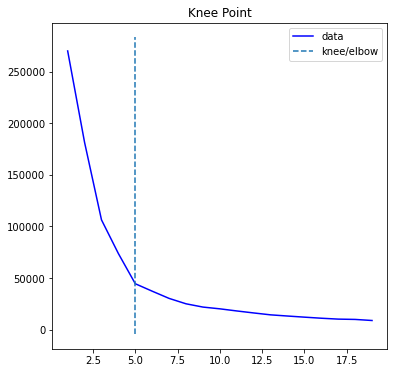

In [36]:
kn.plot_knee()

In [37]:
kn.knee

5

# After Elbow

In [38]:
kmeans2 = cluster.KMeans(n_clusters=5) 
predicted = kmeans2.fit_predict(df[['income','score']])
df['predicted'] = predicted
df.head()

,Gender,age,income,score,predicted
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


In [39]:
centers2 = kmeans2.cluster_centers_

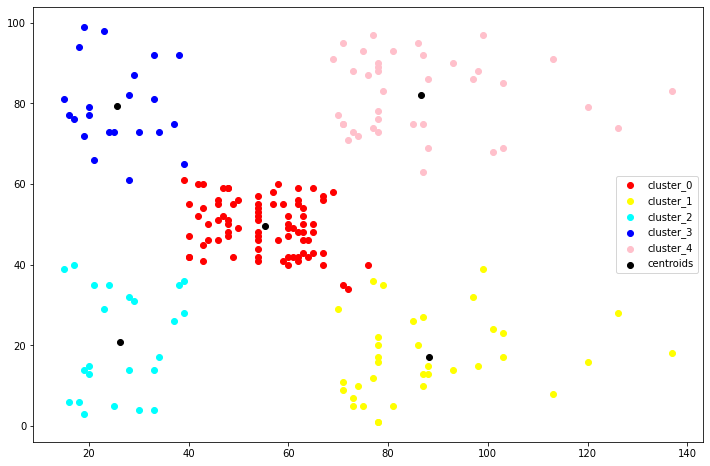

In [40]:
df0 = df[df.predicted == 0]
df1 = df[df.predicted == 1]
df2 = df[df.predicted == 2]
df3 = df[df.predicted == 3]
df4 = df[df.predicted == 4]

plt.figure(figsize=(12,8))
plt.scatter(df0.income , df0.score, color='red', label='cluster_0')
plt.scatter(df1.income , df1.score, color='yellow', label='cluster_1')
plt.scatter(df2.income , df2.score, color='cyan', label='cluster_2')
plt.scatter(df3.income , df3.score, color='blue', label='cluster_3')
plt.scatter(df4.income , df4.score, color='pink', label='cluster_4')

plt.scatter(centers2[:,0], centers2[:,1], color='black', label='centroids')

plt.legend()
